In [20]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import datetime

quandl.ApiConfig.api_key = 'iKwzomXTx_DMWgMDHPLf'


In [22]:
df = quandl.get("WIKI/GOOGL") #Microsoft stock prediction
df = df[['Adj. Close']]
#df
df.head()

,Adj. Close
Date,
2004-08-19,50.322842
2004-08-20,54.322689
2004-08-23,54.869377
2004-08-24,52.597363
2004-08-25,53.164113


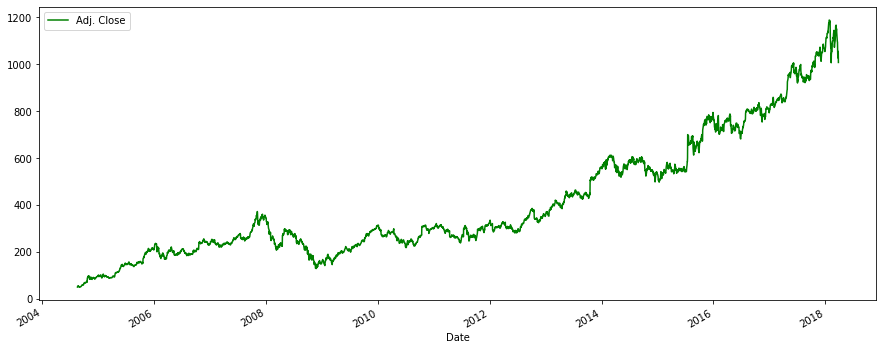

In [13]:
df['Adj. Close'].plot(figsize = (15,6), color = 'g')
plt.legend(loc = 'upper left')
plt.show()

In [26]:
#Preparing training and test set
forecast = 30 #predicting stocks for the next 30 days
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]


In [27]:
#Linear regression model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[1073.77427517 1092.6233781  1111.57403869 1115.77852609 1123.99454132
 1134.31280025 1130.40283009 1148.87616965 1164.72932141 1138.13136852
 1124.32968162 1091.3132842  1104.24157516 1115.02699936 1121.26264009
 1135.62289415 1150.18626355 1182.13630547 1187.3055907  1160.88028584
 1170.00016431 1171.74695617 1155.30476995 1120.41971146 1116.08319909
 1114.25516109 1072.76885427 1045.75451495 1073.72349634 1025.83905652]


(736080.0, 737059.9)

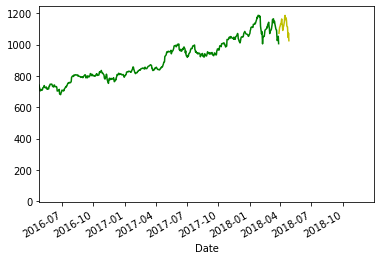

In [32]:
#Visualization of stock prediction
dates = pd.date_range(start = "2018-03-28", end="2018-04-26")
plt.plot(dates, forecast_predicted, color = "y")
df['Adj. Close'].plot(color="g")
plt.xlim(xmin = datetime.date(2016,4,26))